In [1]:
# Bike Rental Prediction --------------------------------------------------

In [2]:
# Load the required libraries for analysis of data-------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from fancyimpute import KNN
from random import randrange,uniform
from ggplot import *
from sklearn.metrics import r2_score
from scipy import stats

In [3]:
# Set working directory ---------------------------------------------------
os.chdir("E:\EDWISOR\Project_BikeRent")

# Cross Check current working directory -----------------------------------
os.getcwd()

'E:\\EDWISOR\\Project_BikeRent'

In [4]:
# Load the data --------------------------------------------------------
Bike_Rent = pd.read_csv("day.csv")

In [5]:
# Explore the data --------------------------------------------------------

# Check the dimensions(no of rows and no of columns)
Bike_Rent.shape

(731, 16)

In [6]:
# Check names of dataset
Bike_Rent.columns

# Variables names in shortcuts like, hum for humidity  yr for year ,mnth for month,cnt for count Lets rename these variables

# Rename variables in dataset
Bike_Rent = Bike_Rent.rename(columns = {'yr':'year','mnth':'month','weathersit':'weather',
                                        'temp':'temperature','hum':'humidity','cnt':'count'})

Bike_Rent.columns


Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temperature', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
# Check top(first) rows of dataset 
Bike_Rent.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# Check bottom(last) rows of dataset 
Bike_Rent.tail()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [9]:
# Check structure of dataset(data structure of each variable)
Bike_Rent.dtypes

instant          int64
dteday          object
season           int64
year             int64
month            int64
holiday          int64
weekday          int64
workingday       int64
weather          int64
temperature    float64
atemp          float64
humidity       float64
windspeed      float64
casual           int64
registered       int64
count            int64
dtype: object

In [10]:
# Check summary of dataset 
Bike_Rent.describe()

,instant,season,year,month,holiday,weekday,workingday,weather,temperature,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
# Variable Identification 
Bike_Rent['count'].dtypes

dtype('int64')

In [12]:
# Remove these variables 
# instant variable, as it is index in dataset
# date variable as we have to predict count on seasonal basis not date basis
# casual and registered variable as count is sum of these two variables
# cnt = casual + registered

Bike_Rent = Bike_Rent.drop(['casual','registered','instant','dteday'],axis=1)

# Lets check dimensions of data after removing some variables
Bike_Rent.shape


(731, 12)

In [13]:
# Make Seperate categorical and numerical variables dataframe 

# Continous Variables 
cnames= ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

# Categorical variables-
cat_cnames=['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather']


In [14]:
# EDA or Data Preprocessing  ----------------------------------------------

In [15]:
# Missing Value anlysis ---------------------------------------------------
# Check missing values in dataset
Bike_Rent.isnull().sum()

# there is no missing values present in this dataset

season         0
year           0
month          0
holiday        0
weekday        0
workingday     0
weather        0
temperature    0
atemp          0
humidity       0
windspeed      0
count          0
dtype: int64

temperature


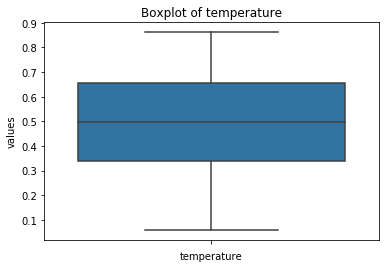

atemp


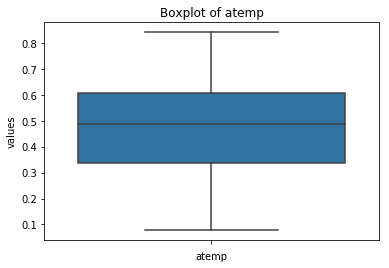

humidity


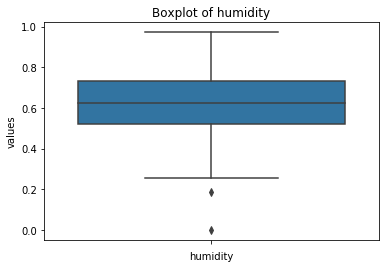

windspeed


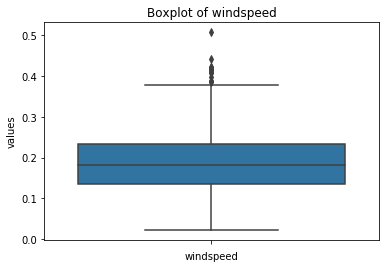

count


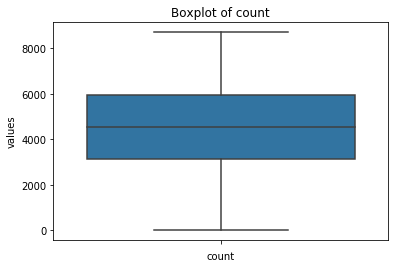

In [16]:
# Outlier Analysis and treatment ----------------------------------------
# Lets save copy of dataset before preprocessing
df = Bike_Rent.copy()
Bike_Rent = df.copy() 

# Lets use boxplot to detect and visulaze the outliers using sns librray 

for i in cnames:
    print(i)
    sns.boxplot(y=Bike_Rent[i])
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()
    
# From boxplot we can see inliers in humidity and outliers in windspeed

In [17]:
# Lets cap outliers and inliers with upper fence and lower fence values 
for i in cnames:
    print(i)
    # Quartiles and IQR
    q25,q75 = np.percentile(Bike_Rent[i],[25,75])
    IQR = q75-q25
    
    # Lower and upper limits 
    LL = q25 - (1.5 * IQR)
    UL = q75 + (1.5 * IQR)
    
    # Capping with ul for maxmimum values 
    # For inliers
    Bike_Rent.loc[Bike_Rent[i] < LL ,i] = LL 

   # For ioutliers
    Bike_Rent.loc[Bike_Rent[i] > UL ,i] = UL 
     

temperature
atemp
humidity
windspeed
count


temperature


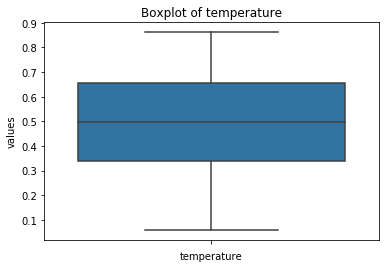

atemp


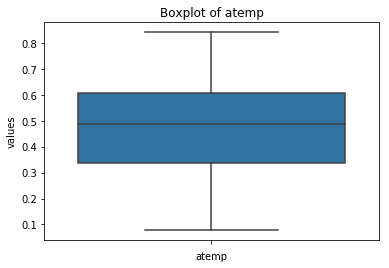

humidity


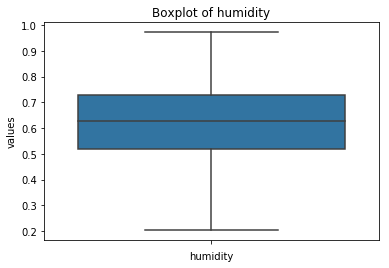

windspeed


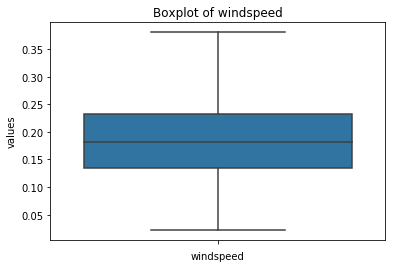

count


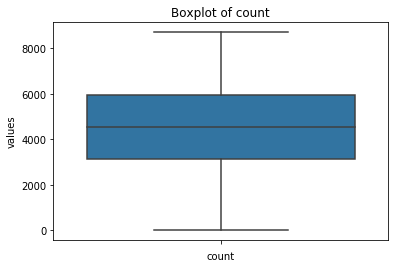

In [18]:
# Lets see our boxplots after removing outliers 

for i in cnames:
    print(i)
    sns.boxplot(y=Bike_Rent[i])
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()

In [19]:
# Visualization -----------------------------------------------------------

In [20]:
# Lets look at numeric and categorical variables 
# Continous Variables 
cnames= ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

# Categorical variables-
cat_cnames=['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather']

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


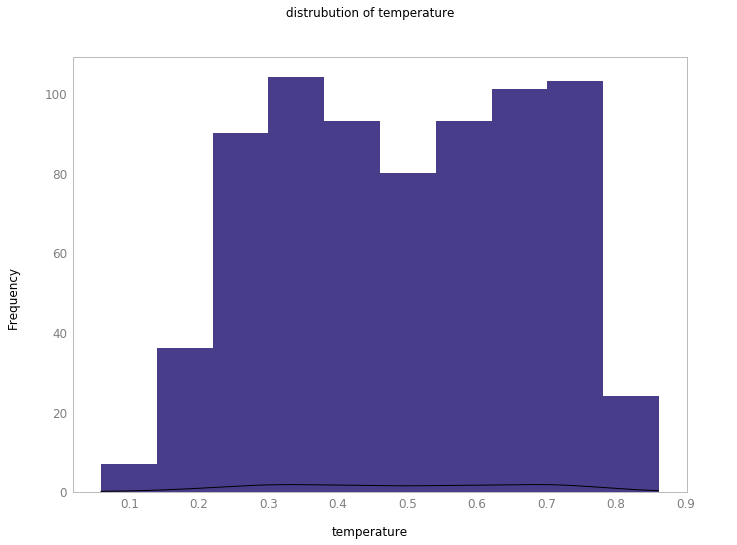

<ggplot: (-9223371916057285821)>

In [21]:
# Univariate Analysis -----------------------------------------------------

# Histogram for all continuous variables to check  distribution of each variable 

# temperature 
ggplot(Bike_Rent,aes(x='temperature')) + geom_histogram(fill="darkslateblue",colour = "black")+\
   geom_density()+\
   theme_bw() + xlab("temperature") + ylab("Frequency") +ggtitle("distrubution of temperature")+\
   theme(text=element_text(size=20)) 

# normally distributed

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


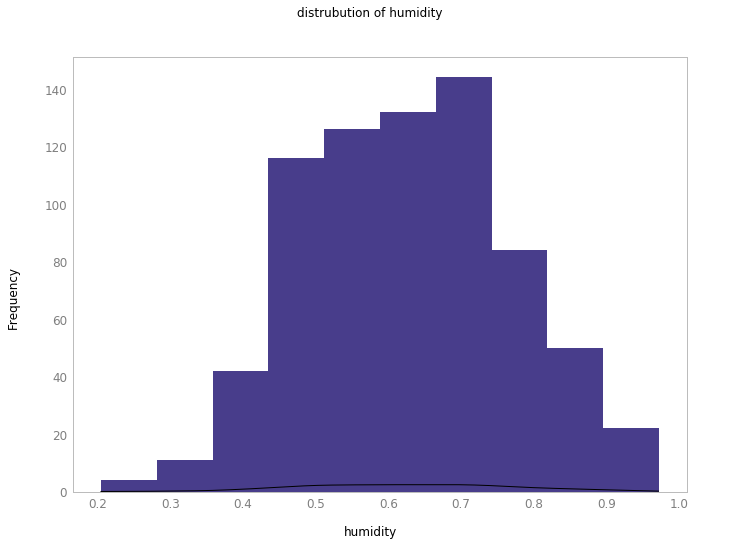

<ggplot: (-9223371916056592496)>

In [22]:
# humidity 
ggplot(Bike_Rent,aes(x='humidity')) + geom_histogram(fill="darkslateblue",colour = "black")+\
   geom_density()+\
   theme_bw() + xlab("humidity") + ylab("Frequency") +ggtitle("distrubution of humidity")+\
   theme(text=element_text(size=20)) 
# normally distributed

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


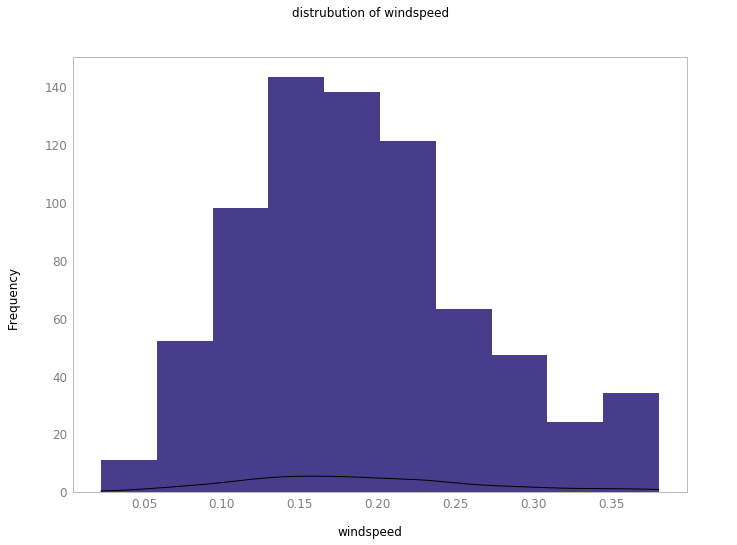

<ggplot: (-9223371916056583217)>

In [23]:
# windspeed
ggplot(Bike_Rent,aes(x='windspeed')) + geom_histogram(fill="darkslateblue",colour = "black")+\
   geom_density()+\
   theme_bw() + xlab("windspeed") + ylab("Frequency") +ggtitle("distrubution of windspeed")+\
   theme(text=element_text(size=20)) 
# normally distributed

C:\ProgramData\Anaconda3\lib\site-packages\ggplot\themes\theme.py:134: RuntimeWarning: text is an invalid theme parameter
  warnings.warn(msg, RuntimeWarning)


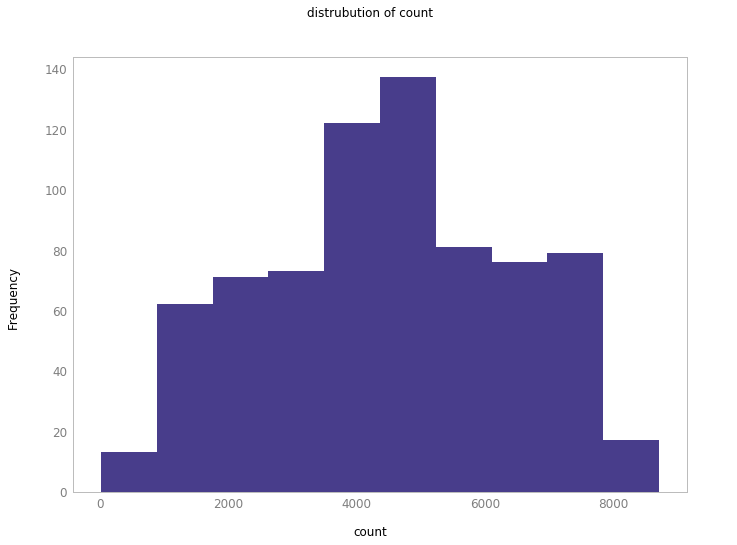

<ggplot: (120798213759)>

In [24]:
# count
ggplot(Bike_Rent,aes(x='count')) + geom_histogram(fill="darkslateblue",colour = "black")+\
   geom_density()+\
   theme_bw() + xlab("count") + ylab("Frequency") +ggtitle("distrubution of count")+\
   theme(text=element_text(size=20)) 
# normally distributed

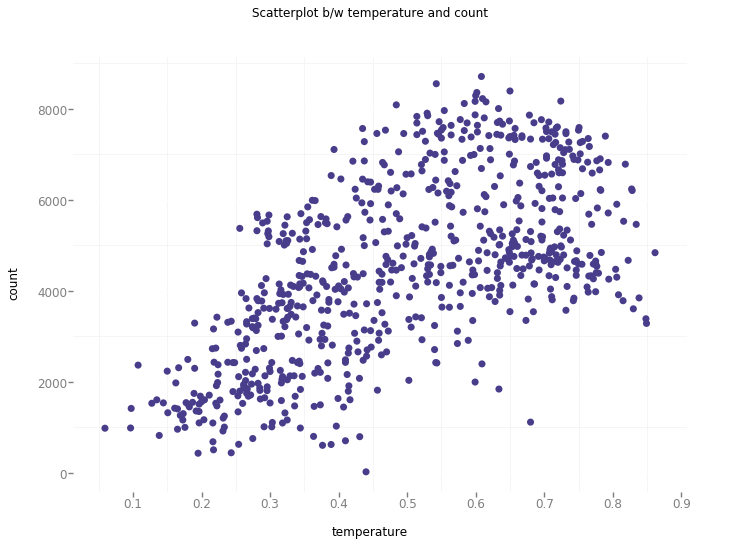

<ggplot: (120798230981)>

In [25]:
# Bivariate Analysis ------------------------------------------------------
# Lets check impact of continous variables on target variable

# count vs temperature
ggplot(aes(x="temperature",y="count"),data=Bike_Rent)+\
  geom_point(alpha=1,size=50,color="DarkSlateBlue")+theme_bw()+ylab("count")+xlab("temperature")+ggtitle("Scatterplot b/w temperature and count")
# as temperature increase Bike rent count also increases 

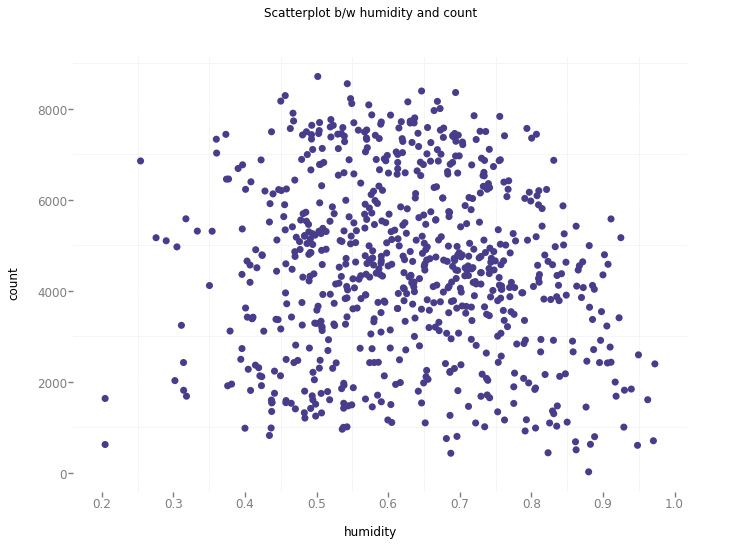

<ggplot: (-9223371916057687513)>

In [26]:
# count vs humidity
ggplot(aes(x="humidity",y="count"),data=Bike_Rent)+\
  geom_point(alpha=1,size=50,color="DarkSlateBlue")+theme_bw()+ylab("count")+xlab("humidity")+ggtitle("Scatterplot b/w humidity and count")

# humidity doesnt have any effect on bikerent count

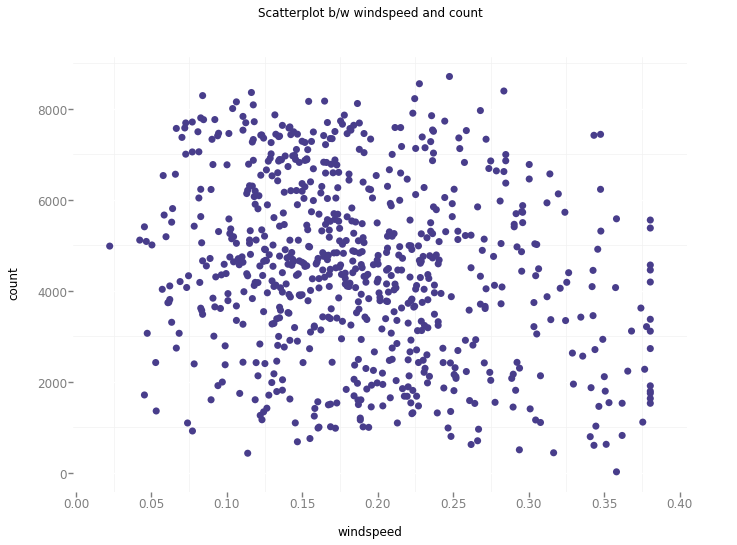

<ggplot: (120797088264)>

In [27]:
# count vs windspeed

ggplot(aes(x="windspeed",y="count"),data=Bike_Rent)+\
  geom_point(alpha=1,size=50,color="DarkSlateBlue")+theme_bw()+ylab("count")+xlab("windspeed")+ggtitle("Scatterplot b/w windspeed and count")

# windspeed doesnt have any effect on bikerent count

season
1     471348.0
2     918589.0
3    1061129.0
4     841613.0
Name: count, dtype: float64


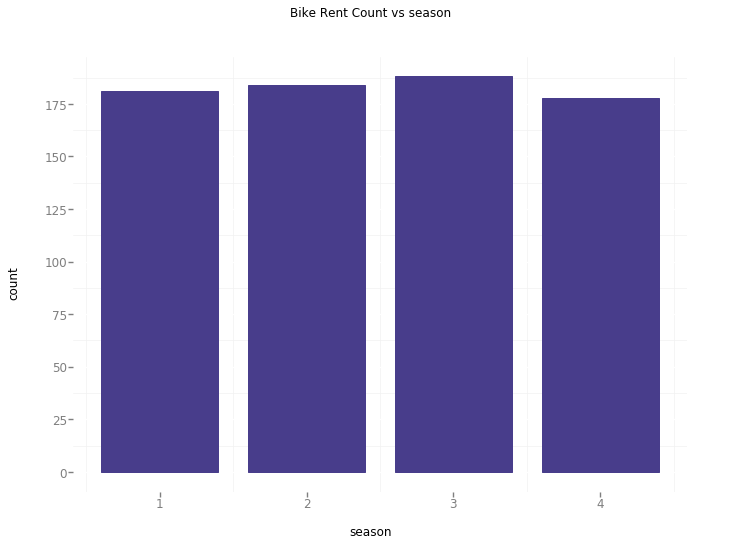

<ggplot: (120797451226)>

In [28]:
# Let us check impact of categorical variables on count 
# Season
print(Bike_Rent.groupby(['season'])['count'].sum())


ggplot(Bike_Rent,aes(x='season',y='count'))+\
    geom_bar(fill="DarkSlateBlue")+\
    scale_color_brewer(type = 'diverging',palette=4)+\
    xlab("season")+ylab("count") + ggtitle("Bike Rent Count vs season")+ theme_bw()

# Bike rent count is high in season 3(fall) and low in season 1(springer)

year
0    1243103.0
1    2049576.0
Name: count, dtype: float64


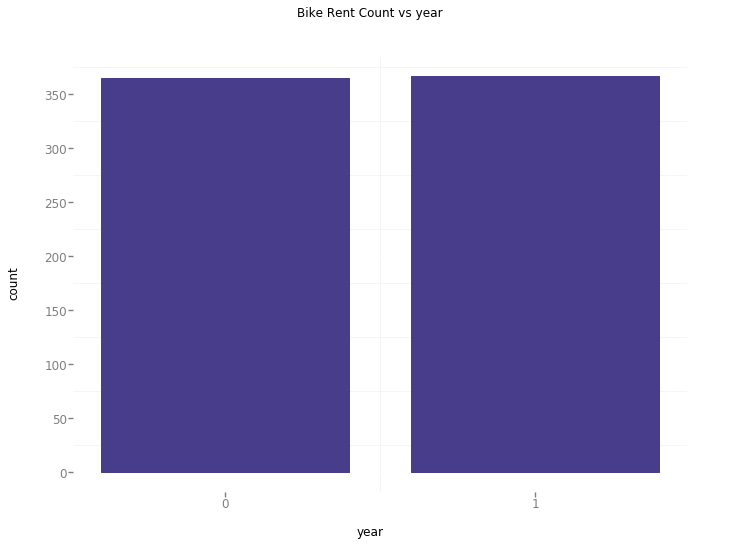

<ggplot: (120797351765)>

In [29]:
# Year
print(Bike_Rent.groupby(['year'])['count'].sum())


ggplot(Bike_Rent,aes(x='year',y='count'))+\
    geom_bar(fill="DarkSlateBlue")+\
    scale_color_brewer(type = 'diverging',palette=4)+\
    xlab("year")+ylab("count") + ggtitle("Bike Rent Count vs year")+ theme_bw()

# Bike rent count is high in year 1 (in 2012)

month
1     134933.0
2     151352.0
3     228920.0
4     269094.0
5     331686.0
6     346342.0
7     344948.0
8     351194.0
9     345991.0
10    322352.0
11    254831.0
12    211036.0
Name: count, dtype: float64


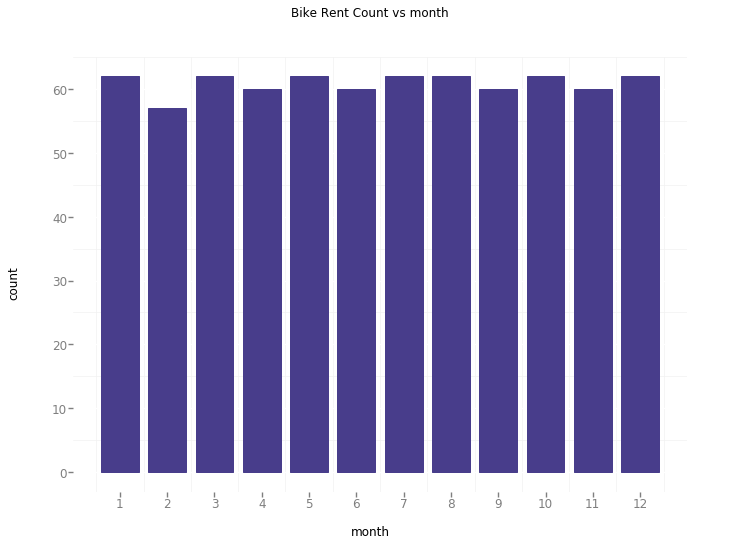

<ggplot: (-9223371916057342092)>

In [30]:
# month
print(Bike_Rent.groupby(['month'])['count'].sum())


ggplot(Bike_Rent,aes(x='month',y='count'))+\
    geom_bar(fill="DarkSlateBlue",stat='sum')+\
    scale_color_brewer(type = 'diverging',palette=4)+\
    xlab("month")+ylab("count") + ggtitle("Bike Rent Count vs month")+ theme_bw()

# Bike rent count is high in month of august and low in jan

holiday
0    3214244.0
1      78435.0
Name: count, dtype: float64


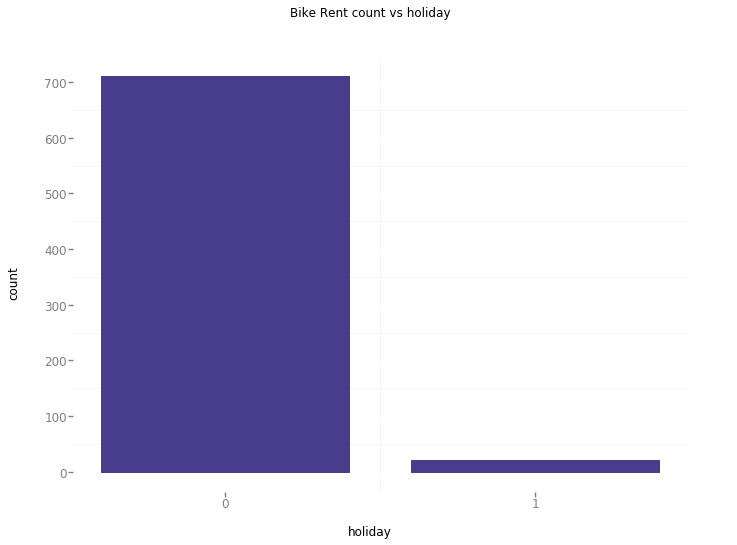

<ggplot: (120797429147)>

In [31]:
# holiday
print(Bike_Rent.groupby(['holiday'])['count'].sum())


ggplot(Bike_Rent,aes(x='holiday',y='count'))+\
    geom_bar(fill="DarkSlateBlue")+\
    scale_color_brewer(type = 'diverging',palette=4)+\
    xlab("holiday")+ylab("count") + ggtitle("Bike Rent count vs holiday")+ theme_bw()

#  Bike rent count is high in holiday ie 0

weekday
0    444027.0
1    455503.0
2    469109.0
3    473048.0
4    485395.0
5    487790.0
6    477807.0
Name: count, dtype: float64


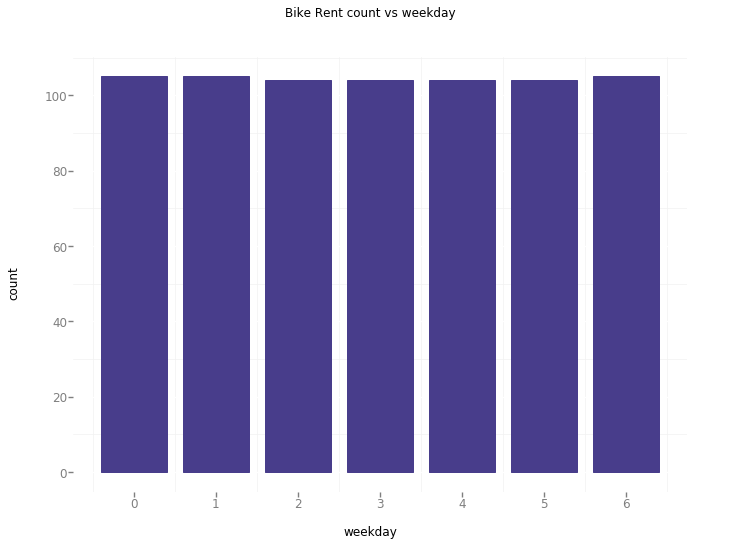

<ggplot: (120798322517)>

In [32]:
# weekday
print(Bike_Rent.groupby(['weekday'])['count'].sum())


ggplot(Bike_Rent,aes(x='weekday',y='count'))+\
    geom_bar(fill="DarkSlateBlue")+\
    scale_color_brewer(type = 'diverging',palette=4)+\
    xlab("weekday")+ylab("count") + ggtitle("Bike Rent count vs weekday")+ theme_bw()

# From bar plot we can see maximum bikes rented on 5th day and least bikes on day 0.

workingday
0    1000269.0
1    2292410.0
Name: count, dtype: float64


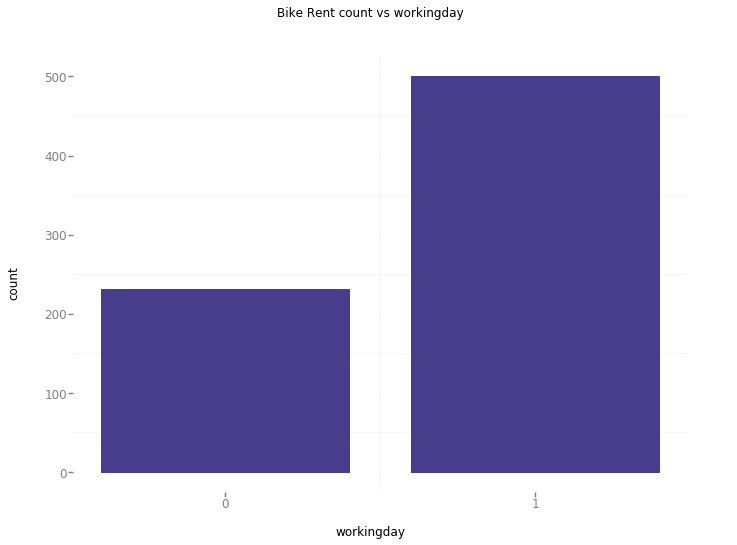

<ggplot: (120798343530)>

In [33]:
# workingday
print(Bike_Rent.groupby(['workingday'])['count'].sum())


ggplot(Bike_Rent,aes(x='workingday',y='count'))+\
    geom_bar(fill="DarkSlateBlue")+\
    scale_color_brewer(type = 'diverging',palette=4)+\
    xlab("workingday")+ylab("count") + ggtitle("Bike Rent count vs workingday")+ theme_bw()

# Bike rent count is high on working day  ie 1

weather
1    2257952.0
2     996858.0
3      37869.0
Name: count, dtype: float64


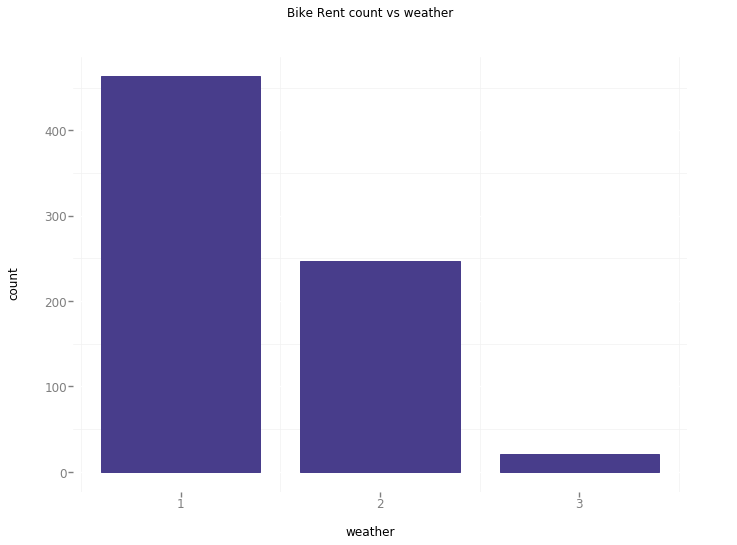

<ggplot: (-9223371916056418658)>

In [34]:
# weather
print(Bike_Rent.groupby(['weather'])['count'].sum())


ggplot(Bike_Rent,aes(x='weather',y='count'))+\
    geom_bar(fill="DarkSlateBlue")+\
    scale_color_brewer(type = 'diverging',palette=4)+\
    xlab("weather")+ylab("count") + ggtitle("Bike Rent count vs weather")+ theme_bw()

# Bike rent count is high on weather 1: ie when the weather is 
# Clear, Few clouds, Partly cloudy, Partly cloudy

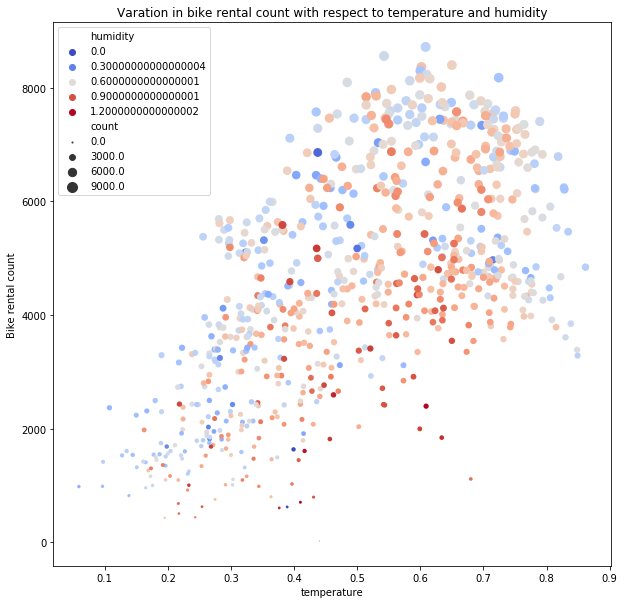

In [35]:
# Bikes rented with respect to temp and humidity--------------
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="temperature", y="count",
                hue="humidity", size="count",
                palette="coolwarm",sizes=(1, 100), linewidth=0,
                data=Bike_Rent,ax=ax)
plt.title("Varation in bike rental count with respect to temperature and humidity")
plt.ylabel("Bike rental count")
plt.xlabel("temperature")
plt.savefig('bike_temp & humidity_plot.png')

# From the plot we can see that count is maximum when temprature 0.4 to 0.7 and humidity below 0.75.

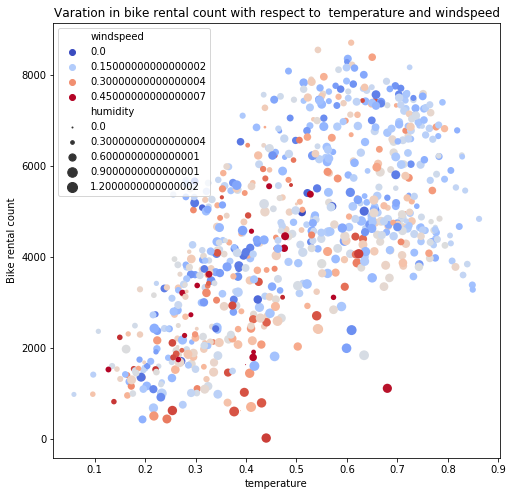

In [36]:
#Bikes rented with respect to temp and windspeed------------------
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x="temperature", y="count",
                hue="windspeed", size="humidity",
                palette="coolwarm",sizes=(1, 100), linewidth=0,
                data=Bike_Rent,ax=ax)
plt.title("Varation in bike rental count with respect to  temperature and windspeed")
plt.ylabel("Bike rental count")
plt.xlabel("temperature")
plt.savefig('bike_temp & windspeed_plot.png')

#From the above plot we can see bike count is maximum between temp 0.5 to 0.7, windspped below 0.15 and humidity less than 0.75

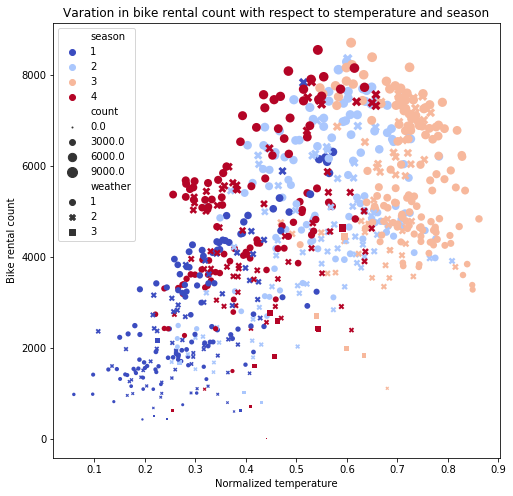

In [37]:
# Bikes rented with respect to temp and season--------------------
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x="temperature", y="count",
                hue="season", size="count",style= "weather",
                palette="coolwarm",sizes=(1, 100), linewidth=0,
                data=Bike_Rent,ax=ax)
plt.title("Varation in bike rental count with respect to stemperature and season")
plt.ylabel("Bike rental count")
plt.xlabel("Normalized temperature")
plt.savefig('bike_temp&season_plot.pdf')

# From figure it is clear that maximum bike count is for season 2 and 3, when the temp between 0.5 to 0.7, and weather was 1 and 2

In [38]:
# Feature Selection -------------------------------------------------------

In [39]:
# Lets save dataset after outlier analysis 
df =  Bike_Rent.copy()
Bike_Rent = df.copy()

             temperature     atemp  humidity  windspeed     count
temperature     1.000000  0.991702  0.126722  -0.156916  0.627494
atemp           0.991702  1.000000  0.139924  -0.182948  0.631066
humidity        0.126722  0.139924  1.000000  -0.241160 -0.105664
windspeed      -0.156916 -0.182948 -0.241160   1.000000 -0.233657
count           0.627494  0.631066 -0.105664  -0.233657  1.000000


Text(0.5, 1.0, 'Correlation Plot of Continous Variables')

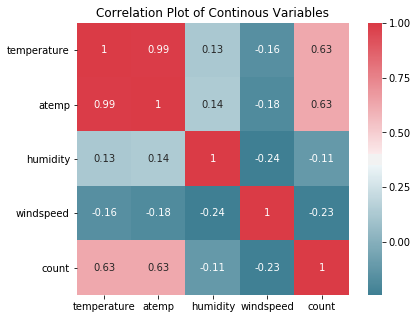

In [40]:
# Correlation analysis
# Using corrplot library we do correlation analysis for numeric variables
# Lets recall numeric variabls and derive correlation matrix and plot

# Continous Variables 
cnames= ['temperature', 'atemp', 'humidity', 'windspeed', 'count']

# Correlation matrix 
# Extract only numeric variables in dataframe for correlation
df_corr= Bike_Rent.loc[:,cnames]

# Generate correlation matrix
corr_matrix = df_corr.corr()
(print(corr_matrix))

# Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Plot using seaborn library
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

plt.title("Correlation Plot of Continous Variables")

# From correlation analysis temp and atemp variables are highly correlated 
# so delete atemp variable 

In [41]:
# Categorical variables-
cat_cnames=['season', 'year', 'month', 'holiday', 'weekday', 'workingday','weather']

In [42]:
# Lets find significant categorical variables usig ANOVA test 

# Anova analysis for categorical variable with target numeric variable

import statsmodels.api as sm
from statsmodels.formula.api import ols

for i in cat_cnames:
    mod = ols('count' + '~' + i, data = Bike_Rent).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)

                sum_sq     df           F        PR(>F)
season    4.517974e+08    1.0  143.967653  2.133997e-30
Residual  2.287738e+09  729.0         NaN           NaN
                sum_sq     df           F        PR(>F)
year      8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
month     2.147445e+08    1.0  62.004625  1.243112e-14
Residual  2.524791e+09  729.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.246109e+07    1.0  3.331091  0.068391
Residual  2.727074e+09  729.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                sum_sq     df          F   

In [43]:
# From the anova result, we can observe working day,weekday and holiday 
# has p value > 0.05, so delete this variable not consider in model.

In [44]:
# Dimension reduction  -------------------------------------------------
Bike_Rent = Bike_Rent.drop(['atemp', 'holiday','weekday','workingday'], axis=1)

In [45]:
# Lets check dimensions after dimension reduction 
Bike_Rent.shape

(731, 8)

In [46]:
# Lets check column names after dimension reduction 
Bike_Rent.columns

Index(['season', 'year', 'month', 'weather', 'temperature', 'humidity',
       'windspeed', 'count'],
      dtype='object')

In [47]:
# Lets define/update  continous and categorical variables after dimension reduction

# Continuous variable
cnames = ['temperature','humidity', 'windspeed', 'count']

# Categorical variables
cat_cnames = ['season', 'year', 'month','weather']

In [48]:
# Feature Scaling  --------------------------------------------------------
# Since as it is mentioned in data dictionary the values of 
# temp,humidity,windspeed variables are already normalized values so no 
# need to go for feature scaling instead we will visualize the variables 
# to see normality  

temperature


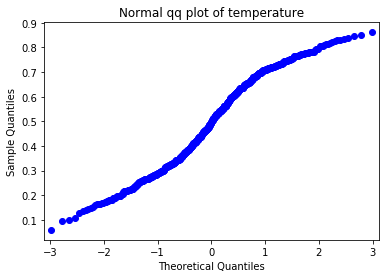

humidity


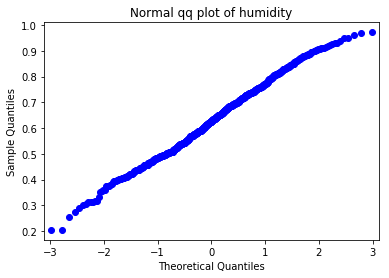

windspeed


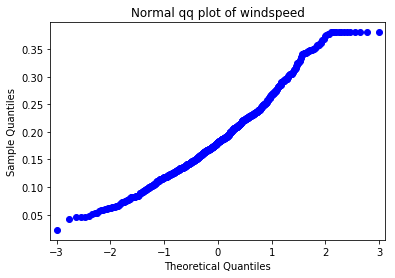

count


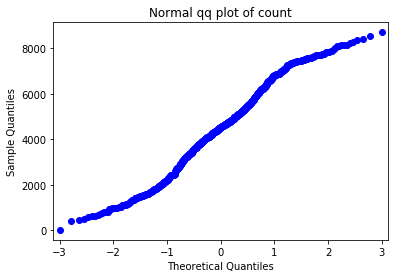

In [49]:
for i in cnames:
    print(i)
    sm.qqplot(Bike_Rent[i])
    plt.title("Normal qq plot of " +i)
    plt.show()

temperature


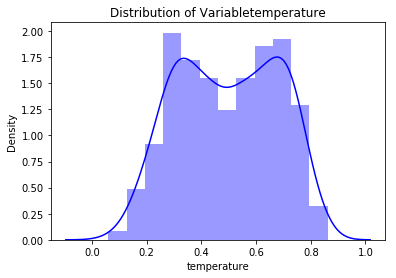

humidity


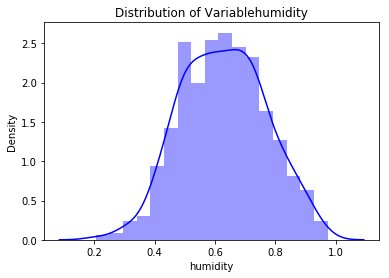

windspeed


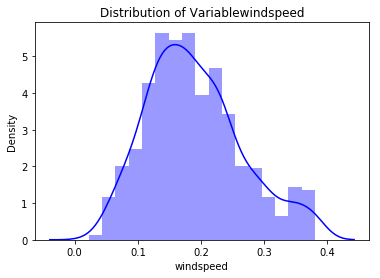

count


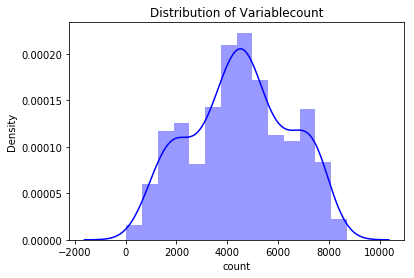

In [50]:
for i in cnames:
    print(i)
    sns.distplot(Bike_Rent[i],bins='auto',color='blue')
    plt.title("Distribution of Variable"+i)
    plt.ylabel("Density")
    plt.show()

In [51]:
Bike_Rent.describe()

# from distribution plot,normal qq plot  and summary  it is clear that data is already normalized.

,season,year,month,weather,temperature,humidity,windspeed,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,1.395349,0.495385,0.628197,0.189846,4504.348837
std,1.110807,0.500342,3.451913,0.544894,0.183051,0.141320,0.075644,1937.211452
min,1.000000,0.000000,1.000000,1.000000,0.059130,0.204687,0.022392,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.337083,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,1.000000,0.498333,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,2.000000,0.655417,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,3.000000,0.861667,0.972500,0.380611,8714.000000


In [52]:
# Model Development -------------------------------------------------------

In [53]:
# Load Required libraries for model development 
from sklearn.model_selection import train_test_split #used to split dataset into train and test
from sklearn.metrics import mean_squared_error # used to calculate MSE
from sklearn.metrics import r2_score # used to calculate r square
from sklearn.linear_model import LinearRegression # For linear regression
from sklearn.tree import DecisionTreeRegressor # For Decision Tree
from sklearn.ensemble import RandomForestRegressor # For RandomForest
from sklearn import metrics

In [54]:
# Lets convert all categorical variables ito dummy variables 
# As we cant pass categorical variables directly in to regression problems
# Lets save our preprocessed data into df data set 

df = Bike_Rent
Bike_Rent = df

# Lets call Categorical varaibles after feature selection using ANOVA 
cat_cnames = ['season', 'year', 'month','weather']

#  Create categorical variables to dummy variables-
Bike_Rent = pd.get_dummies(Bike_Rent,columns=cat_cnames)


In [55]:
Bike_Rent.shape

(731, 25)

In [56]:
Bike_Rent.head()

,temperature,humidity,windspeed,count,season_1,season_2,season_3,season_4,year_0,year_1,...,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weather_1,weather_2,weather_3
0,0.344167,0.805833,0.160446,985.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
# Lets Divide the data into train and test set 

# Split data for predictor and target seperatly
X= Bike_Rent.drop(['count'],axis=1)
y= Bike_Rent['count']

In [58]:
# Divide data into train and test sets
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.20,random_state=0)

In [59]:
# Function for Error metrics to calculate the performance of model
def MAPE(y_true,y_prediction):
    mape= np.mean(np.abs(y_true-y_prediction)/y_true)*100
    return mape

In [60]:
# Linear Regression model -------------------------------------------------

In [61]:
# Import libraries
import statsmodels.api as sm

# Linear Regression model for regression 
LR_model= sm.OLS(y_train,X_train).fit()
print(LR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     144.9
Date:                Sat, 10 Aug 2019   Prob (F-statistic):          6.64e-207
Time:                        12:56:26   Log-Likelihood:                -4708.1
No. Observations:                 584   AIC:                             9458.
Df Residuals:                     563   BIC:                             9550.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
temperature  4858.9463    470.970     10.317      

In [62]:
# Model prediction on  on train data
LR_train= LR_model.predict(X_train)

# Model prediction on test data
LR_test= LR_model.predict(X_test)

# Model performance on train data
MAPE_train= MAPE(y_train,LR_train)

# Model performance on test data
MAPE_test= MAPE(y_test,LR_test)

# r2 value for train data
r2_train= r2_score(y_train,LR_train)

# r2 value for test data-
r2_test=r2_score(y_test,LR_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,LR_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,LR_test))

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute Precentage Error for train data=43.773719160328625
Mean Absolute Precentage Error for test data=19.685303059218512
R^2_score for train data=0.8373616227857162
R^2_score for test data=0.8392613195741978
RMSE for train data=767.3019650844327
RMSE for test data=826.8280143941663


In [63]:
Error_Metrics = {'Model Name': ['Linear Regression'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}

LR_Results = pd.DataFrame(Error_Metrics)

In [64]:
LR_Results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Linear Regression,43.773719,19.685303,0.837362,0.839261,767.301965,826.828014


In [65]:
# Lets build some more models using different ml algorithms for more accuracy 
# and less prediction error

In [66]:
# Desicision Tree ---------------------------------------------------------
# Lets Build decision tree model on train data
# Import libraries
from sklearn.tree import DecisionTreeRegressor

# Decision tree for regression
DT_model= DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

# Model prediction on train data
DT_train= DT_model.predict(X_train)

# Model prediction on test data
DT_test= DT_model.predict(X_test)

# Model performance on train data
MAPE_train= MAPE(y_train,DT_train)

# Model performance on test data
MAPE_test= MAPE(y_test,DT_test)

# r2 value for train data
r2_train= r2_score(y_train,DT_train)

# r2 value for test data
r2_test=r2_score(y_test,DT_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,DT_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,DT_test))

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str(RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute Precentage Error for train data=62.26013293672567
Mean Absolute Precentage Error for test data=36.94809301452646
R^2_score for train data=0.6775629218593628
R^2_score for test data=0.6464697716428666
RMSE for train data=1080.3818579492188
RMSE for test data=1226.2196190864843


In [67]:
Error_metrics_DT= {'Model Name': ['Decision Tree'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
DT_Results = pd.DataFrame(Error_metrics_DT)

In [68]:
DT_Results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Decision Tree,62.260133,36.948093,0.677563,0.64647,1080.381858,1226.219619


In [69]:
# Random Search CV In Decision Tree ---------------------------------------

In [70]:
# Import libraries 
from sklearn.model_selection import RandomizedSearchCV

RandomDecisionTree = DecisionTreeRegressor(random_state = 0)
depth = list(range(1,20,2))
random_search = {'max_depth': depth}

# Lets build a model using above parameters on train data 
RDT_model= RandomizedSearchCV(RandomDecisionTree,param_distributions= random_search,n_iter=5,cv=5)
RDT_model= RDT_model.fit(X_train,y_train)


In [71]:
# Lets look into best fit parameters
best_parameters = RDT_model.best_params_
print(best_parameters)

{'max_depth': 5}


In [72]:
# Again rebuild decision tree model using randomsearch best fit parameter ie
# with maximum depth = 5
RDT_best_model = RDT_model.best_estimator_

In [73]:
# Prediction on train data 
RDT_train = RDT_best_model.predict(X_train)

# Prediction on test data 
RDT_test = RDT_best_model.predict(X_test)

In [74]:
# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value

# MAPE for train data 
MAPE_train= MAPE(y_train,RDT_train)

# MAPE for test data 
MAPE_test= MAPE(y_test,RDT_test)

# Rsquare for train data
r2_train= r2_score(y_train,RDT_train)

# Rsquare for test data
r2_test=r2_score(y_test,RDT_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RDT_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RDT_test))


# Lets print the results 
print("Best Parameter="+str(best_parameters))
print("Best Model="+str(RDT_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))


Best Parameter={'max_depth': 5}
Best Model=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')
Mean Absolute Precentage Error for train data=14.033005966499518
Mean Absolute Precentage Error for test data=22.953146224112512
R^2_score for train data=0.8751273963022054
R^2_score for test data=0.8119334705716881
RMSE for train data=672.3391146008586
RMSE for test data=894.3566460313768


In [75]:
Error_metrics_RDT= {'Model Name': ['Decision Tree Random Search CV'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
RDT_Results = pd.DataFrame(Error_metrics_RDT)

In [76]:
RDT_Results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Decision Tree Random Search CV,14.033006,22.953146,0.875127,0.811933,672.339115,894.356646


In [77]:
# Grid Search CV in Decision Tree -----------------------------------------

In [78]:
# Import libraries
from sklearn.model_selection import GridSearchCV

GridDecisionTree= DecisionTreeRegressor(random_state=0)
depth= list(range(1,20,2))
grid_search= {'max_depth':depth}

# Lets build a model using above parameters on train data
GDT_model= GridSearchCV(GridDecisionTree,param_grid=grid_search,cv=5)
GDT_model= GDT_model.fit(X_train,y_train)

In [79]:
# Lets look into best fit parameters from gridsearch cv DT
best_parameters = GDT_model.best_params_
print(best_parameters)

{'max_depth': 5}


In [80]:
# Again rebuild decision tree model using gridsearch best fit parameter ie
# with maximum depth = 5
GDT_best_model = GDT_model.best_estimator_

In [81]:
# Prediction on train data 
GDT_train = GDT_best_model.predict(X_train)

# Prediction on train data  test data-
GDT_test = GDT_best_model.predict(X_test)

In [82]:
# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value

# MAPE for train data 

MAPE_train= MAPE(y_train,GDT_train)

# MAPE for test data 
MAPE_test= MAPE(y_test,GDT_test)

# Rsquare for train data
r2_train= r2_score(y_train,GDT_train)

# Rsquare for train data
r2_test=r2_score(y_test,GDT_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,GDT_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GDT_test))


print("Best Parameter="+str(best_parameters))
print("Best Model="+str(GDT_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))


Best Parameter={'max_depth': 5}
Best Model=DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')
Mean Absolute Precentage Error for train data=14.033005966499518
Mean Absolute Precentage Error for test data=22.953146224112512
R^2_score for train data=0.8751273963022054
R^2_score for test data=0.8119334705716881
RMSE for train data=672.3391146008586
RMSE for test data=894.3566460313768


In [83]:
Error_metrics_GDT= {'Model Name': ['Decision Tree Grid Search CV'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
GDT_Results = pd.DataFrame(Error_metrics_GDT)

In [84]:
GDT_Results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Decision Tree Grid Search CV,14.033006,22.953146,0.875127,0.811933,672.339115,894.356646


In [85]:
# Random Forest -------------------------------------------

In [86]:
# Import libraris
from sklearn.ensemble import RandomForestRegressor

# Random Forest for regression
RF_model= RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# Prediction on train data
RF_train= RF_model.predict(X_train)

# Prediction on test data
RF_test= RF_model.predict(X_test)

# MAPE For train data
MAPE_train= MAPE(y_train,RF_train)

# MAPE For test data
MAPE_test= MAPE(y_test,RF_test)

# Rsquare  For train data
r2_train= r2_score(y_train,RF_train)

# Rsquare  For test data
r2_test=r2_score(y_test,RF_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RF_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RF_test))

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))


Mean Absolute Precentage Error for train data=15.828285823742712
Mean Absolute Precentage Error for test data=20.47113261918587
R^2_score for train data=0.9814562863023861
R^2_score for test data=0.8831592433065325
RMSE for train data=259.09149145131295
RMSE for test data=704.9400159042818


In [87]:
RF_test= RF_model.predict(X_test)

In [88]:
# Lets print results of Randomforest random search
Error_metrics_RF= {'Model Name': ['Random Forest'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
RF_Results = pd.DataFrame(Error_metrics_RF)

In [89]:
RF_Results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Random Forest,15.828286,20.471133,0.981456,0.883159,259.091491,704.940016


In [90]:
# Random Search CV in Random Forest  --------------------------------------

In [91]:
# Import libraries
from sklearn.model_selection import RandomizedSearchCV

RandomRandomForest = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,100,2))
depth = list(range(1,20,2))
random_search = {'n_estimators':n_estimator, 'max_depth': depth}

# Lets build a model using above parameters on train data
RRF_model= RandomizedSearchCV(RandomRandomForest,param_distributions= random_search,n_iter=5,cv=5)
RRF_model= RRF_model.fit(X_train,y_train)

In [92]:
# Best parameters for model
best_parameters = RRF_model.best_params_
print(best_parameters)

{'n_estimators': 45, 'max_depth': 9}


In [93]:
# Again rebuild random forest  model using gridsearch best fit parameter ie {'n_estimators': 91, 'max_depth': 9}
RRF_best_model = RRF_model.best_estimator_

In [94]:
# Prediction on train data
RRF_train = RRF_best_model.predict(X_train)

# Prediction on test data
RRF_test = RRF_best_model.predict(X_test)

In [95]:
# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value

# MAPE for train data 
MAPE_train= MAPE(y_train,RRF_train)

# MAPE for test data
MAPE_test= MAPE(y_test,RRF_test)

# Rsquare for train data
r2_train= r2_score(y_train,RRF_train)

# Rsquare for test data
r2_test=r2_score(y_test,RRF_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,RRF_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,RRF_test))


print("Best Parameter="+str(best_parameters))
print("Best Model="+str(RRF_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Best Parameter={'n_estimators': 45, 'max_depth': 9}
Best Model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
Mean Absolute Precentage Error for train data=21.529458152907903
Mean Absolute Precentage Error for test data=20.146194892081763
R^2_score for train data=0.9668116697021103
R^2_score for test data=0.8836456675803124
RMSE for train data=346.61511407590126
RMSE for test data=703.4711039645434


In [96]:
# Lets print results of Randomforest random search
Error_metrics_RRF= {'Model Name': ['Random Forest Random Search CV'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
RRF_results = pd.DataFrame(Error_metrics_RRF)

In [97]:
RRF_results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Random Forest Random Search CV,21.529458,20.146195,0.966812,0.883646,346.615114,703.471104


In [98]:
# Grid search CV in Random Forest  ----------------------------------------

In [99]:
# Import libraries
from sklearn.model_selection import GridSearchCV

GridRandomForest= RandomForestRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth= list(range(1,20,2))
grid_search= {'n_estimators':n_estimator, 'max_depth': depth}

In [100]:
# Lets build a model using above parameters on train data using random forest grid search cv 
GRF_model= GridSearchCV(GridRandomForest,param_grid=grid_search,cv=5)
GRF_model= GRF_model.fit(X_train,y_train)

In [101]:
# Best fit parameters for model
best_parameters_GRF = GRF_model.best_params_
print(best_parameters_GRF)

{'max_depth': 11, 'n_estimators': 19}


In [102]:
# Again rebuild random forest model using gridsearch best fit parameter {'max_depth': 11, 'n_estimators': 19}
GRF_best_model = GRF_model.best_estimator_

In [103]:
# Prediction on train data
GRF_train = GRF_best_model.predict(X_train)

# Prediction on test data
GRF_test = GRF_best_model.predict(X_test)

In [104]:
# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value

# MAPE for train data
MAPE_train= MAPE(y_train,GRF_train)

# MAPE for test data
MAPE_test= MAPE(y_test,GRF_test)

# Rsquare for train data
r2_train= r2_score(y_train,GRF_train)

# Rsquare for test data
r2_test=r2_score(y_test,GRF_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,GRF_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GRF_test))

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(GRF_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Best Parameter={'n_estimators': 45, 'max_depth': 9}
Best Model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=19, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
Mean Absolute Precentage Error for train data=17.211392601914795
Mean Absolute Precentage Error for test data=20.531873507898496
R^2_score for train data=0.9741224001720741
R^2_score for test data=0.8814341818812964
RMSE for train data=306.06720008461343
RMSE for test data=710.1248894715083


In [105]:
# Lets print results of Randomforest grid search cv
Error_metrics_GRF= {'Model Name': ['Random Forest Grid Search CV'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
GRF_results = pd.DataFrame(Error_metrics_GRF)

In [106]:
GRF_results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Random Forest Grid Search CV,17.211393,20.531874,0.974122,0.881434,306.0672,710.124889


In [107]:
# Gradient Boosting -------------------------------------------------------

In [108]:
# Import libraries
from sklearn.ensemble import GradientBoostingRegressor

# Lets build a Gradient Boosting model for regression problem
GB_model = GradientBoostingRegressor().fit(X_train, y_train)

# Model prediction on train data
GB_train= GB_model.predict(X_train)

# Model prediction on test data
GB_test= GB_model.predict(X_test)

# Model performance on train data
MAPE_test= MAPE(y_train,GB_train)

# Model performance on test data
MAPE_test= MAPE(y_test,GB_test)

# Rsquare value for train data
r2_train= r2_score(y_train,GB_train)

# Rsquare value for test data
r2_test=r2_score(y_test,GB_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,GB_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GB_test))


print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Mean Absolute Precentage Error for train data=17.211392601914795
Mean Absolute Precentage Error for test data=18.858039685649324
R^2_score for train data=0.9492901918330808
R^2_score for test data=0.867707421781389
RMSE for train data=428.4506224460579
RMSE for test data=750.1061457415512


In [109]:
# Lets print the result 
Error_metrics_GB = {'Model Name': ['Gradient Boosting'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
GB_results = pd.DataFrame(Error_metrics_GB)

In [110]:
GB_results 

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Gradient Boosting,17.211393,18.85804,0.94929,0.867707,428.450622,750.106146


In [111]:
# Random Search CV in Gradient Boosting -----------------------------------

In [112]:
# Import libraries
from sklearn.model_selection import RandomizedSearchCV

RandomGradientBoosting = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,100,2))
depth = list(range(1,20,2))
random_search = {'n_estimators':n_estimator, 'max_depth': depth}

In [113]:
# Lets build a model using above parameters on train data
RGB_model= RandomizedSearchCV(RandomGradientBoosting,param_distributions= random_search,n_iter=5,cv=5)
RGB_model= RGB_model.fit(X_train,y_train)

In [114]:
# Best parameters for model
best_parameters = RGB_model.best_params_
print(best_parameters)

{'n_estimators': 87, 'max_depth': 1}


In [115]:
# Again rebuild random forest model using gridsearch best fit parameter {'n_estimators': 67, 'max_depth': 9}
RGB_best_model = RGB_model.best_estimator_

In [116]:
# Prediction on train data
RGB_train = RGB_best_model.predict(X_train)

# Prediction on test data
RGB_test = RGB_best_model.predict(X_test)

In [117]:
# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value

# MAPE for train data
MAPE_train= MAPE(y_train,RGB_train)

# MAPE for test data
MAPE_test= MAPE(y_test,RGB_test)

# Rsquare for train data
r2_train= r2_score(y_train,RGB_train)

# Rsquare for test data
r2_test=r2_score(y_test,RGB_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,LR_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,LR_test))

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(RGB_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Best Parameter={'n_estimators': 87, 'max_depth': 1}
Best Model=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=87, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
Mean Absolute Precentage Error for train data=43.19931111667831
Mean Absolute Precentage Error for test data=21.837795274668427
R^2_score for train data=0.8516292708734716
R^2_score for test data=0.8313751032133235
RMSE for train data=767.3019650844327
RMSE for test data=826.8280143941663


In [118]:
Error_metrics_RGB= {'Model Name': ['Gradient Boosting Random Search CV'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],
      'R-squared_Train':[r2_train],'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
RGB_results = pd.DataFrame(Error_metrics_RGB)

In [119]:
RGB_results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Gradient Boosting Random Search CV,43.199311,21.837795,0.851629,0.831375,767.301965,826.828014


In [120]:
# Grid Search CV in Gradient Boosting -------------------------------------

In [121]:
# Import libraries
from sklearn.model_selection import GridSearchCV

GridGradientBoosting= GradientBoostingRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth= list(range(1,20,2))
grid_search= {'n_estimators':n_estimator, 'max_depth': depth}

In [122]:
# Lets build a model using above parameters on train data(Grind Random Forest)
GGB_model= GridSearchCV(GridGradientBoosting,param_grid=grid_search,cv=5)
GGB_model= GGB_model.fit(X_train,y_train)

In [123]:
# Best parameters for model
best_parameters = GGB_model.best_params_
print(best_parameters)

{'max_depth': 7, 'n_estimators': 19}


In [124]:
# Again rebuild random forest model using gridsearch best fit parameter {'n_estimators': 67, 'max_depth': 9}
GGB_best_model = GGB_model.best_estimator_

In [125]:
# Prediction on train data
GGB_train = GGB_best_model.predict(X_train)

# Prediction on test data
GGB_test = GGB_best_model.predict(X_test)

In [126]:
# Lets check Model performance on both test and train using error metrics of regression like mape,rsquare value

# MAPE for train data
MAPE_train= MAPE(y_train,GGB_train)

# MAPE for test data
MAPE_test= MAPE(y_test,GGB_test)

# Rsquare value for train data
r2_train= r2_score(y_train,GGB_train)

# Rsquare value for test data
r2_test=r2_score(y_test,GGB_test)

# RMSE value for train data
RMSE_train = np.sqrt(metrics.mean_squared_error(y_train,GGB_train))

# RMSE value for test data
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test,GGB_test))

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(GGB_best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))
print("RMSE for train data="+str (RMSE_train))
print("RMSE for test data="+str(RMSE_test))

Best Parameter={'max_depth': 7, 'n_estimators': 19}
Best Model=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=7, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=19, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
Mean Absolute Precentage Error for train data=14.959465464174068
Mean Absolute Precentage Error for test data=25.317824368403834
R^2_score for train data=0.9606323836380347
R^2_score for test data=0.8382361541994363
RMSE for train data=377.5064307976871
RMSE for test data=829.4605115045094


In [127]:
Error_metrics_GGB = {'Model Name': ['Gradient Boosting Grid Search CV'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],
      'R-squared_Train':[r2_train],'R-squared_Test':[r2_test],'RMSE_train':[RMSE_train],'RMSE_test':[RMSE_test]}
GGB_Results = pd.DataFrame(Error_metrics_GGB)

In [128]:
GGB_Results 

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Gradient Boosting Grid Search CV,14.959465,25.317824,0.960632,0.838236,377.506431,829.460512


In [129]:
Final_Results = pd.concat([LR_Results,DT_Results,RDT_Results,GDT_Results,RF_Results,RRF_results,GRF_results,GB_results,RGB_results,GGB_Results], ignore_index=True, sort =False)

In [130]:
Final_Results

,Model Name,MAPE_Train,MAPE_Test,R-squared_Train,R-squared_Test,RMSE_train,RMSE_test
0,Linear Regression,43.773719,19.685303,0.837362,0.839261,767.301965,826.828014
1,Decision Tree,62.260133,36.948093,0.677563,0.646470,1080.381858,1226.219619
2,Decision Tree Random Search CV,14.033006,22.953146,0.875127,0.811933,672.339115,894.356646
3,Decision Tree Grid Search CV,14.033006,22.953146,0.875127,0.811933,672.339115,894.356646
4,Random Forest,15.828286,20.471133,0.981456,0.883159,259.091491,704.940016
5,Random Forest Random Search CV,21.529458,20.146195,0.966812,0.883646,346.615114,703.471104
6,Random Forest Grid Search CV,17.211393,20.531874,0.974122,0.881434,306.067200,710.124889
7,Gradient Boosting,17.211393,18.858040,0.949290,0.867707,428.450622,750.106146
8,Gradient Boosting Random Search CV,43.199311,21.837795,0.851629,0.831375,767.301965,826.828014
9,Gradient Boosting Grid Search CV,14.959465,25.317824,0.960632,0.838236,377.506431,829.460512


In [131]:
# From above results Random Forest model have optimum values and this
# algorithm is good for our data 

# Lets save the out put of finalized model (RF)

input = y_test.reset_index()
pred = pd.DataFrame(RF_test,columns = ['pred'])
Final_output = pred.join(input)

In [132]:
Final_output

,pred,index,count
0,5048.60,196,5923.0
1,4592.21,187,4592.0
2,1484.18,14,1248.0
3,1141.24,31,1360.0
4,3501.41,390,4075.0
5,2702.61,319,1817.0
6,3951.75,299,2659.0
7,6230.77,702,6234.0
8,6031.94,462,6857.0
9,877.22,27,1167.0


In [133]:
Final_output.to_csv("RF_results_py.csv")


In [134]:
#-----------------------------------------------------End------------------------------------------------------------------------------#